In [1]:
#!pip install boruta

In [2]:
#!pip install lightgbm


# **Data preparation**

In [3]:
#Importing the libraries
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import statsmodels.api as sm

# **Loading the dataset**

In [2]:
# Load the CSV file
ADHD = pd.read_csv("adhd.csv")
# Display the sample data
print(ADHD)

           Fp1     Fp2     F3     F4     C3     C4     P3     P4     O1  \
0        156.0    85.0   89.0  121.0  126.0  163.0  126.0  236.0  200.0   
1         85.0   121.0  126.0  121.0  384.0  236.0  347.0  273.0  200.0   
2        191.0   261.0  200.0  367.0   89.0  310.0   89.0  310.0  126.0   
3        156.0   156.0  200.0  261.0  126.0  163.0  236.0  163.0  310.0   
4       -160.0  -371.0   16.0 -407.0  163.0 -204.0   52.0 -167.0   89.0   
...        ...     ...    ...    ...    ...    ...    ...    ...    ...   
499995    85.0    15.0   89.0   50.0   89.0   52.0  200.0  236.0  347.0   
499996   261.0  -583.0  236.0   85.0  126.0  200.0   89.0  163.0  126.0   
499997   191.0   332.0   52.0   15.0  236.0  347.0  273.0  310.0  273.0   
499998  2373.0  1212.0  200.0   50.0   16.0  -20.0   52.0   52.0   52.0   
499999   226.0   261.0   89.0   85.0  163.0  163.0   52.0  273.0  273.0   

           O2     F7     F8     T7     T8     P7     P8     Fz     Cz     Pz  \
0       384.0  200.

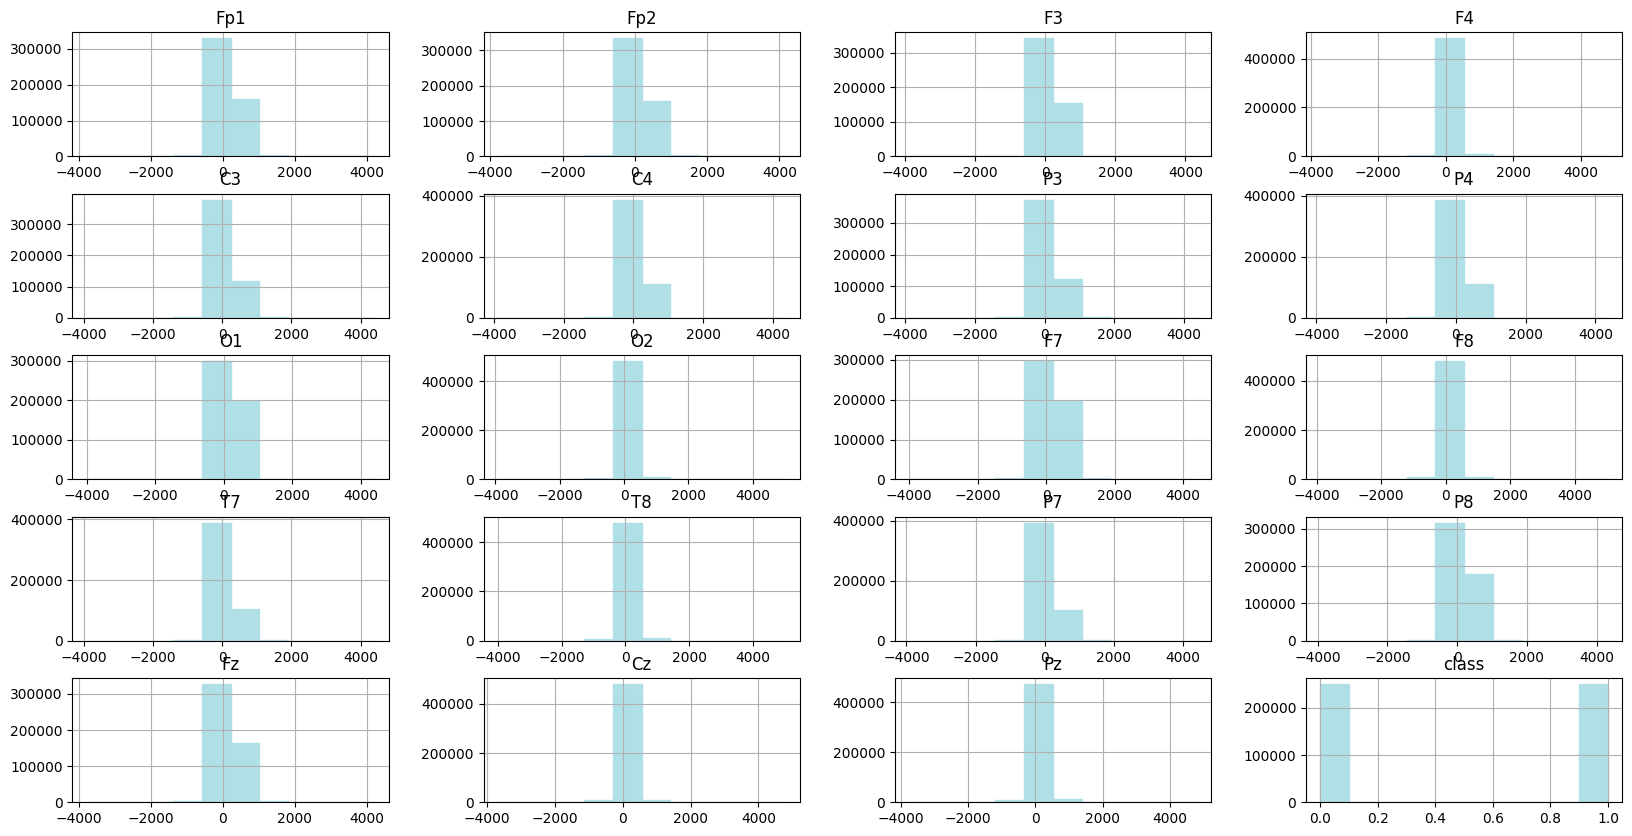

In [5]:
import matplotlib.pyplot as plt

ADHD.hist(figsize= (20, 10), edgecolor= "powderblue", color= "powderblue")
plt.show()

In [6]:
ADHD.head()

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T7,T8,P7,P8,Fz,Cz,Pz,class
1009438,-618.0,-442.0,89.0,121.0,273.0,1046.0,236.0,310.0,89.0,310.0,163.0,52.0,384.0,89.0,310.0,200.0,191.0,332.0,332.0,1
1050049,-19.0,-55.0,-20.0,-19.0,-94.0,310.0,-20.0,89.0,89.0,200.0,-131.0,-57.0,-20.0,16.0,52.0,16.0,15.0,50.0,85.0,1
996789,-90.0,-19.0,52.0,121.0,89.0,126.0,126.0,200.0,163.0,200.0,89.0,163.0,273.0,200.0,236.0,273.0,156.0,297.0,226.0,1
1225114,85.0,-19.0,126.0,50.0,200.0,200.0,273.0,347.0,384.0,457.0,200.0,163.0,200.0,310.0,236.0,384.0,226.0,121.0,297.0,1
956436,-1040.0,-301.0,-388.0,-19.0,-425.0,-683.0,-351.0,52.0,-241.0,200.0,-462.0,52.0,-425.0,16.0,-646.0,-20.0,-442.0,85.0,-371.0,0


In [7]:
ADHD.tail()

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T7,T8,P7,P8,Fz,Cz,Pz,class
385861,156.0,226.0,273.0,191.0,200.0,310.0,200.0,126.0,89.0,89.0,89.0,200.0,457.0,273.0,236.0,200.0,226.0,297.0,226.0,0
1464015,85.0,-90.0,200.0,-55.0,163.0,16.0,200.0,89.0,310.0,52.0,163.0,16.0,126.0,16.0,126.0,126.0,-19.0,-125.0,261.0,1
1572,15.0,226.0,-57.0,15.0,-94.0,89.0,-131.0,89.0,-315.0,-20.0,16.0,126.0,-94.0,89.0,-388.0,-131.0,50.0,85.0,-160.0,0
306871,191.0,85.0,89.0,85.0,126.0,126.0,163.0,200.0,273.0,273.0,126.0,200.0,126.0,200.0,236.0,236.0,85.0,156.0,121.0,0
1237335,-90.0,50.0,126.0,226.0,200.0,200.0,200.0,273.0,52.0,126.0,163.0,347.0,236.0,310.0,16.0,236.0,226.0,191.0,297.0,1


In [8]:
ADHD.shape

(500000, 20)

In [9]:
ADHD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, 1009438 to 1237335
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Fp1     500000 non-null  float64
 1   Fp2     500000 non-null  float64
 2   F3      500000 non-null  float64
 3   F4      500000 non-null  float64
 4   C3      500000 non-null  float64
 5   C4      500000 non-null  float64
 6   P3      500000 non-null  float64
 7   P4      500000 non-null  float64
 8   O1      500000 non-null  float64
 9   O2      500000 non-null  float64
 10  F7      500000 non-null  float64
 11  F8      500000 non-null  float64
 12  T7      500000 non-null  float64
 13  T8      500000 non-null  float64
 14  P7      500000 non-null  float64
 15  P8      500000 non-null  float64
 16  Fz      500000 non-null  float64
 17  Cz      500000 non-null  float64
 18  Pz      500000 non-null  float64
 19  class   500000 non-null  int64  
dtypes: float64(19), int64(1)
memory usage: 80.1 MB

In [10]:
# check the columns in data
ADHD.columns

Index(['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7',
       'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'class'],
      dtype='object')

In [11]:
# check the datatypes of columns
ADHD.dtypes

Fp1      float64
Fp2      float64
F3       float64
F4       float64
C3       float64
C4       float64
P3       float64
P4       float64
O1       float64
O2       float64
F7       float64
F8       float64
T7       float64
T8       float64
P7       float64
P8       float64
Fz       float64
Cz       float64
Pz       float64
class      int64
dtype: object

In [12]:
# check for some null or missing values in our dataset
ADHD.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [13]:
# checking the duplicate roes in the data
duplicate_rows= ADHD[ADHD.duplicated()]

# print the duplicate rows
print("numbers of duplicates rows:" , duplicate_rows.shape)

numbers of duplicates rows: (3, 20)


In [14]:
# removing the duplicate rows
ADHD = ADHD.drop_duplicates()

In [15]:
# checking the duplicate roes in the data
duplicate_rows= ADHD[ADHD.duplicated()]

# print the duplicate rows
print("numbers of duplicates rows:" , duplicate_rows.shape)

numbers of duplicates rows: (0, 20)


In [16]:
ADHD['class'].value_counts()

class
1    250338
0    249659
Name: count, dtype: int64

In [17]:
corr = ADHD.corr('pearson')
corr['class']

Fp1     -0.000326
Fp2      0.001721
F3      -0.000752
F4       0.001494
C3       0.000148
C4       0.001004
P3       0.001913
P4       0.003307
O1       0.002792
O2       0.002874
F7       0.001577
F8       0.002934
T7       0.001511
T8       0.002140
P7       0.002422
P8       0.003195
Fz       0.001336
Cz       0.001629
Pz       0.002754
class    1.000000
Name: class, dtype: float64

In [18]:
ADHD.describe()

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,F7,F8,T7,T8,P7,P8,Fz,Cz,Pz,class
count,499997.000000,499997.000000,499997.000000,499997.000000,499997.000000,499997.000000,499997.000000,499997.000000,499997.000000,499997.000000,499997.000000,499997.000000,499997.000000,499997.000000,499997.000000,499997.000000,499997.000000,499997.000000,499997.000000,499997.000000
mean,136.413274,136.395532,142.465759,136.274494,142.391600,142.344626,142.364660,141.873065,142.294990,141.781645,142.667086,141.816125,141.713066,141.445163,141.980852,141.644206,136.079970,136.050400,135.853887,0.500679
std,276.568801,269.658340,226.021714,213.745379,228.605961,212.063958,236.511816,211.334565,228.408807,214.415871,251.117427,230.782813,235.612319,228.800574,214.480700,206.334299,259.152558,215.490076,233.530010,0.500000
min,-3786.000000,-3786.000000,-3884.000000,-3715.000000,-3921.000000,-3884.000000,-3884.000000,-3884.000000,-3995.000000,-3921.000000,-3995.000000,-3884.000000,-3921.000000,-3995.000000,-3921.000000,-3921.000000,-3786.000000,-3680.000000,-3751.000000,0.000000
25%,15.000000,15.000000,16.000000,50.000000,52.000000,52.000000,16.000000,52.000000,52.000000,52.000000,16.000000,52.000000,52.000000,52.000000,52.000000,52.000000,15.000000,15.000000,15.000000,0.000000
50%,121.000000,121.000000,126.000000,121.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,121.000000,121.000000,121.000000,1.000000
75%,261.000000,261.000000,236.000000,226.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,261.000000,226.000000,261.000000,1.000000
max,4204.000000,4169.000000,4321.000000,4802.000000,4395.000000,4358.000000,4358.000000,4358.000000,4395.000000,5020.000000,4395.000000,5020.000000,4395.000000,5020.000000,4395.000000,4321.000000,4204.000000,4802.000000,4802.000000,1.000000


class
1    250338
0    249659
Name: count, dtype: int64


<Axes: xlabel='class', ylabel='count'>

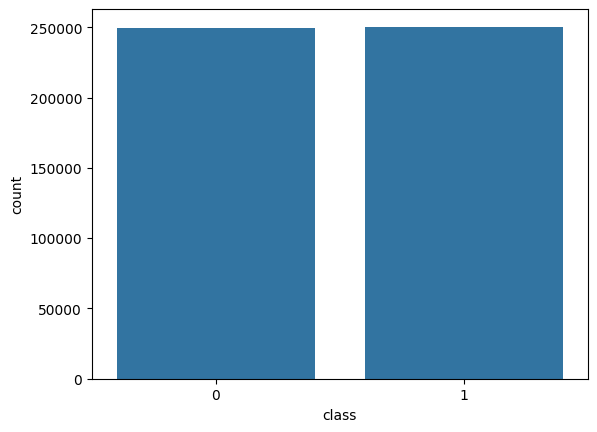

In [19]:
print(ADHD['class'].value_counts())
sns.countplot(x= 'class', data=ADHD)


**Feature Selection**

In [20]:
from boruta import BorutaPy
import lightgbm as lgb

def feature_extraction_selection_boruta(ADHD):
    # Separate features and target variable
    X = ADHD.drop(columns=['class'])
    y = ADHD['class']

    # Initialize LightGBM classifier with additional parameters
    lgbm = lgb.LGBMClassifier(
        boosting_type='gbdt',
        objective='binary',
        metric='binary_logloss',
        class_weight='balanced',
        learning_rate=0.5,
        max_depth=10,
        random_state=42,
        num_leaves=50,
        min_child_samples=20,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.5,
        reg_lambda=0.5,
        n_estimators=100
    )

    # Initialize Boruta feature selector with additional parameters
    selector = BorutaPy(
        lgbm,
        n_estimators='auto',
        max_iter=50,           # Maximum number of iterations to run
        perc=100,               # Percentage of features to consider during the selection
        alpha=0.5,             # Significance level to use for selecting features
        two_step=True,          # Use the two-step method
        random_state=42,        # Set a random seed for reproducibility
        verbose=2
    )

    # Fit Boruta
    selector.fit(X.values, y.values)

    # Get selected features
    selected_features = X.columns[selector.support_]

    # Filter dataframe with selected features
    df_selected = ADHD[selected_features]

    return df_selected

# Apply feature extraction and selection using BorutaPy with LightGBM
df_selected_features_boruta = feature_extraction_selection_boruta(ADHD)
# Verify selected features
print("Selected Features using BorutaPy with LightGBM:", df_selected_features_boruta.columns)


[LightGBM] [Info] Number of positive: 250338, number of negative: 249659
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.157970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4054
[LightGBM] [Info] Number of data points in the train set: 499997, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Iteration: 	1 / 50
Confirmed: 	19
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	2 / 50
Confirmed: 	19
Tentative: 	0
Rejected: 	0
Selected Features using BorutaPy with LightGBM: Index(['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7',
       'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz'],
      dtype='object')


In [21]:
df_selected_features_boruta.columns

Index(['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7',
       'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz'],
      dtype='object')

# Splitting Data

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Prepare features and target variables for modeling
X = df_selected_features_boruta
y = ADHD['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the split
print(f"Training set size: {X_train_scaled.shape}")
print(f"Testing set size: {X_test_scaled.shape}")

Training set size: (399997, 19)
Testing set size: (100000, 19)


# Model 1: Decision Tree

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Hyperparameters: {'class_weight': None, 'max_depth': 40, 'max_features': None, 'min_samples_leaf': 15, 'min_samples_split': 12}
Training Accuracy: 0.7797
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.65      0.66     49932
           1       0.66      0.68      0.67     50068

    accuracy                           0.66    100000
   macro avg       0.66      0.66      0.66    100000
weighted avg       0.66      0.66      0.66    100000



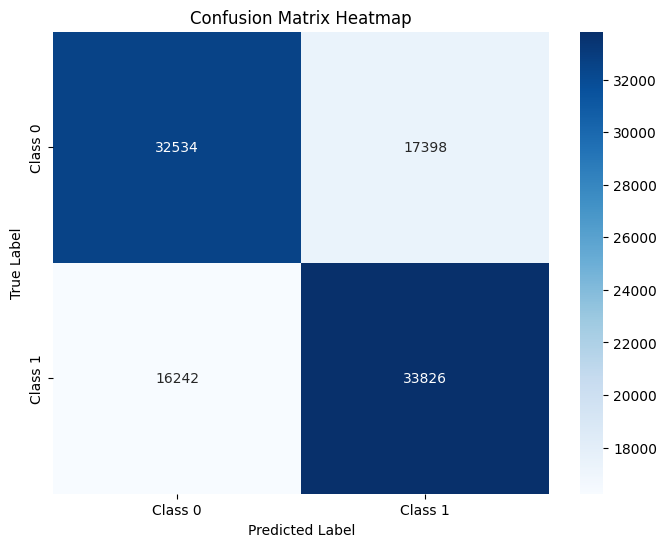

ROC AUC Score: 0.7244


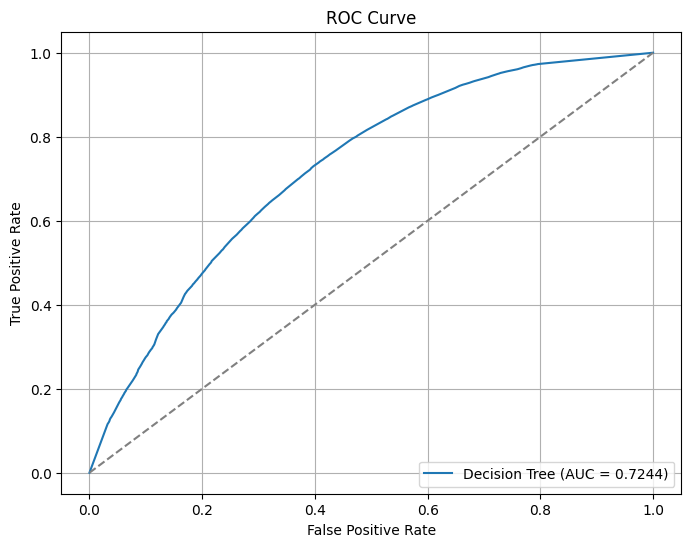

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from scipy.stats import randint

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define expanded hyperparameters distributions for tuning
param_dist = {
    'max_depth': [10, 20, 30, 40, 50, None],  # Added more values
    'min_samples_split': randint(2, 30),  # Expanded range
    'min_samples_leaf': randint(1, 20),  # Expanded range
    'max_features': [None, 'sqrt', 'log2', 0.5],  # Added fraction option
    'class_weight': [None, 'balanced']
}

# Use RandomizedSearchCV for hyperparameter tuning with more folds
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    scoring='accuracy',
    n_jobs=-1,
    cv=2,  # Increased folds
    verbose=2,
    n_iter=10,  # Increased number of iterations
    random_state=42
)

# Train the tuned model using randomized search
random_search.fit(X_train_scaled, y_train)

# Get the best model from random search
best_dt = random_search.best_estimator_

# Print best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, best_dt.predict(X_train_scaled))
print(f"Training Accuracy: {train_accuracy:.4f}")

# Make predictions on the test set
y_pred = best_dt.predict(X_test_scaled)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Save the heatmap as a PNG image
plt.savefig('Model_1_confusion_matrix.png', dpi=300, bbox_inches='tight')

# Display the heatmap
plt.show()

# Predict probabilities for ROC AUC calculation
y_prob = best_dt.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Model 2: XBoost

Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:19:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.9, 'n_estimators': 350, 'min_child_weight': 7, 'max_depth': 7, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.7}
Training Accuracy (Tuned): 0.8192
Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.81      0.73      0.76     49932
           1       0.75      0.83      0.79     50068

    accuracy                           0.78    100000
   macro avg       0.78      0.78      0.78    100000
weighted avg       0.78      0.78      0.78    100000



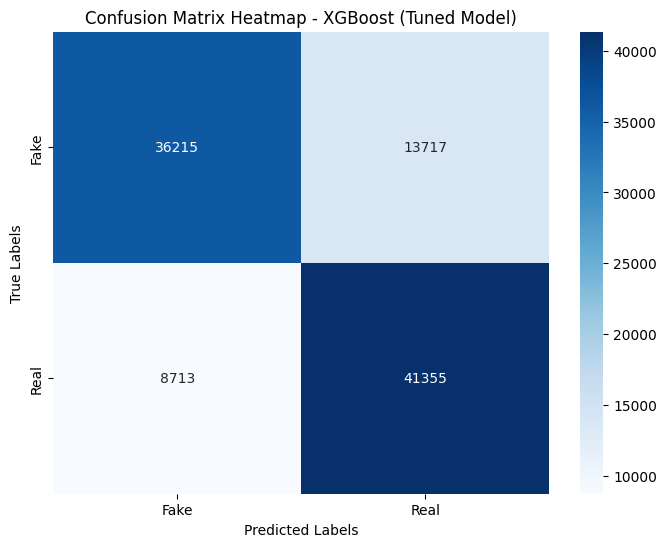

ROC AUC Score (Tuned): 0.8576


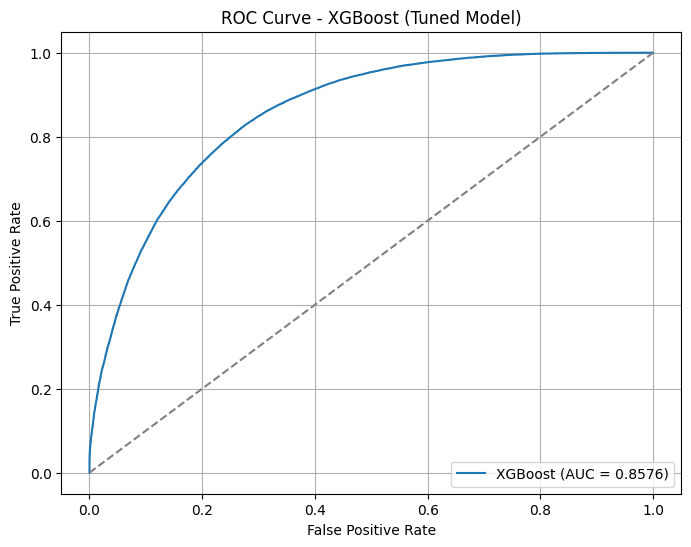

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter grid for XGBoost
param_grid_xgboost = {
    'n_estimators': np.arange(50, 400, 50),  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],  # Step size shrinkage
    'max_depth': np.arange(3, 10),  # Maximum depth of a tree
    'min_child_weight': np.arange(1, 10),  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  # Subsample ratio of the training data
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  # Subsample ratio of features when constructing each tree
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],  # Minimum loss reduction to make a further partition
}

# Initialize the XGBoost classifier
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Initialize RandomizedSearchCV for hyperparameter tuning
random_search_xgboost = RandomizedSearchCV(
    estimator=xgboost,
    param_distributions=param_grid_xgboost,
    n_iter=30,  # Number of parameter settings that are sampled
    scoring='roc_auc',  # Metric to optimize
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit the model to find the best parameters
random_search_xgboost.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params_xgboost = random_search_xgboost.best_params_
print(f"Best Parameters: {best_params_xgboost}")

# Train the tuned model with the best parameters
xgboost_best = random_search_xgboost.best_estimator_

# Calculate training accuracy for the tuned model
train_accuracy_xgboost_best = accuracy_score(y_train, xgboost_best.predict(X_train_scaled))
print(f"Training Accuracy (Tuned): {train_accuracy_xgboost_best:.4f}")

# Make predictions on the test set
y_pred_xgboost_best = xgboost_best.predict(X_test_scaled)

# Generate the classification report for the tuned model
print("Classification Report (Tuned):")
print(classification_report(y_test, y_pred_xgboost_best))

# Generate the confusion matrix
cm_xgboost_best = confusion_matrix(y_test, y_pred_xgboost_best)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgboost_best, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - XGBoost (Tuned Model)')

# Save the heatmap as a PNG image
plt.savefig('Model_2_confusion_matrix.png', dpi=300, bbox_inches='tight')

plt.show()

# Predict probabilities for ROC AUC calculation
y_prob_xgboost_best = xgboost_best.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score for the tuned model
roc_auc_xgboost_best = roc_auc_score(y_test, y_prob_xgboost_best)
print(f"ROC AUC Score (Tuned): {roc_auc_xgboost_best:.4f}")

# Plot ROC curve for the tuned model
fpr_xgboost_best, tpr_xgboost_best, thresholds_xgboost_best = roc_curve(y_test, y_prob_xgboost_best)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgboost_best, tpr_xgboost_best, label=f"XGBoost (AUC = {roc_auc_xgboost_best:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost (Tuned Model)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Model 3: Random Forest

Fitting 2 folds for each of 20 candidates, totalling 40 fits


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666,

Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': True}
Training Accuracy (Tuned Model): 0.9780
Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.79      0.70      0.74     49932
           1       0.73      0.81      0.77     50068

    accuracy                           0.76    100000
   macro avg       0.76      0.76      0.76    100000
weighted avg       0.76      0.76      0.76    100000



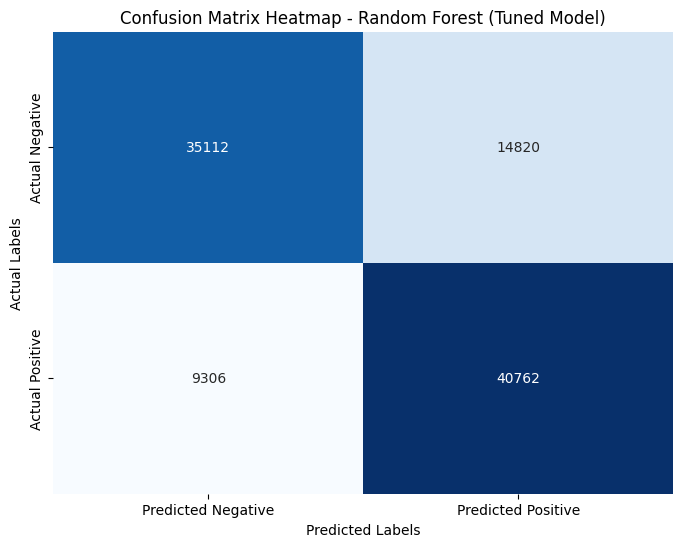

ROC AUC Score (Tuned Model): 0.8398


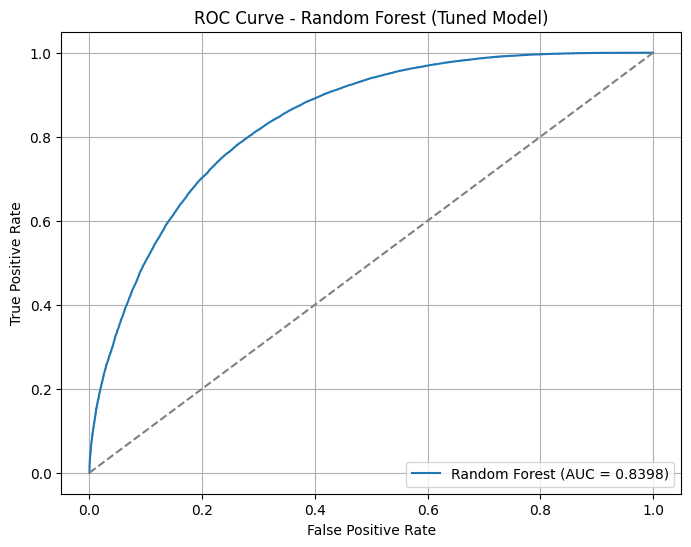

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define the parameter grid for RandomizedSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, 
                                      n_iter=20, cv=2, verbose=2, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV
rf_random_search.fit(X_train_scaled, y_train)

# Retrieve the best hyperparameters
best_rf = rf_random_search.best_estimator_
print("Best Hyperparameters:", rf_random_search.best_params_)

# Calculate training accuracy with the best model
train_accuracy_rf_best = accuracy_score(y_train, best_rf.predict(X_train_scaled))
print(f"Training Accuracy (Tuned Model): {train_accuracy_rf_best:.4f}")

# Make predictions on the test set using the best model
y_pred_rf_best = best_rf.predict(X_test_scaled)

# Generate the classification report
print("Classification Report (Tuned Model):")
print(classification_report(y_test, y_pred_rf_best))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf_best)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap - Random Forest (Tuned Model)')

# Save the heatmap as a PNG image
plt.savefig('Model_3_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Predict probabilities for ROC AUC calculation using the best model
y_prob_rf_best = best_rf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc_rf_best = roc_auc_score(y_test, y_prob_rf_best)
print(f"ROC AUC Score (Tuned Model): {roc_auc_rf_best:.4f}")

# Plot ROC curve for the best model
fpr_rf_best, tpr_rf_best, thresholds_rf_best = roc_curve(y_test, y_prob_rf_best)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_best, tpr_rf_best, label=f"Random Forest (AUC = {roc_auc_rf_best:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Tuned Model)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Model 4: LightGBM

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Info] Number of positive: 200270, number of negative: 199727
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.056149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2940
[LightGBM] [Info] Number of data points in the train set: 399997, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500679 -> initscore=0.002715
[LightGBM] [Info] Start training from score 0.002715
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

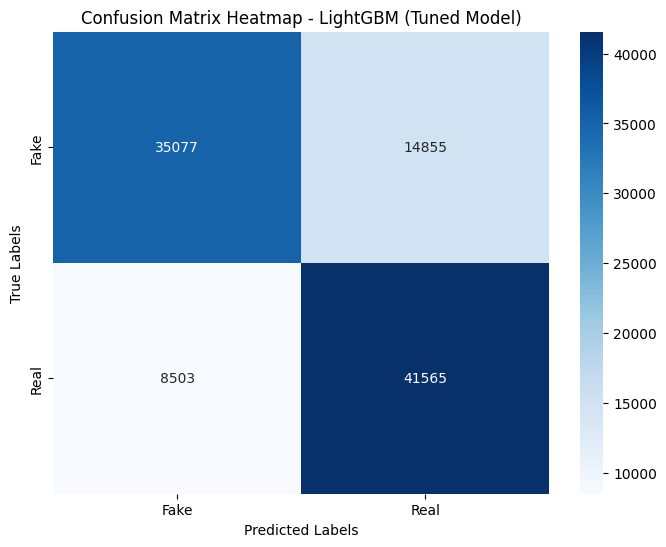

ROC AUC Score (Tuned): 0.8493


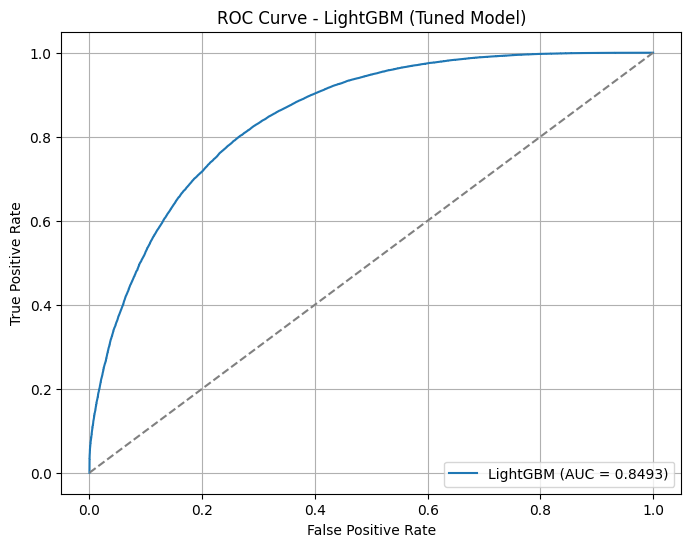

In [26]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the parameter grid for LightGBM
param_grid_lgbm = {
    'num_leaves': np.arange(20, 150, 10),
    'min_child_samples': np.arange(10, 100, 10),
    'max_depth': [3, 5, 7, 9, 12, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': np.arange(50, 300, 50),
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Initialize the LightGBM classifier
lgbm = LGBMClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm, 
    param_distributions=param_grid_lgbm, 
    n_iter=30,  # Number of parameter settings that are sampled
    scoring='roc_auc',  # Metric to optimize
    cv=3,  # 3-fold cross-validation
    verbose=1, 
    n_jobs=-1, 
    random_state=42
)

# Fit the model to find the best parameters
random_search_lgbm.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params_lgbm = random_search_lgbm.best_params_
print(f"Best Parameters: {best_params_lgbm}")

# Train the tuned model with the best parameters
lgbm_best = random_search_lgbm.best_estimator_

# Calculate training accuracy for the tuned model
train_accuracy_lgbm_best = accuracy_score(y_train, lgbm_best.predict(X_train_scaled))
print(f"Training Accuracy (Tuned): {train_accuracy_lgbm_best:.4f}")

# Make predictions on the test set
y_pred_lgbm_best = lgbm_best.predict(X_test_scaled)

# Generate the classification report for the tuned model
print("Classification Report (Tuned):")
print(classification_report(y_test, y_pred_lgbm_best))

# Generate the confusion matrix
cm_lgbm_best = confusion_matrix(y_test, y_pred_lgbm_best)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm_best, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - LightGBM (Tuned Model)')

# Save the heatmap as a PNG image
plt.savefig('Model_4_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Predict probabilities for ROC AUC calculation
y_prob_lgbm_best = lgbm_best.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score for the tuned model
roc_auc_lgbm_best = roc_auc_score(y_test, y_prob_lgbm_best)
print(f"ROC AUC Score (Tuned): {roc_auc_lgbm_best:.4f}")

# Plot ROC curve for the tuned model
fpr_lgbm_best, tpr_lgbm_best, thresholds_lgbm_best = roc_curve(y_test, y_prob_lgbm_best)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm_best, tpr_lgbm_best, label=f"LightGBM (AUC = {roc_auc_lgbm_best:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM (Tuned Model)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Model 5: KNeighbors (KNN)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'euclidean'}
Best Cross-validation Score: 0.7423
Training Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.64      0.72     49932
           1       0.71      0.86      0.78     50068

    accuracy                           0.75    100000
   macro avg       0.76      0.75      0.75    100000
weighted avg       0.76      0.75      0.75    100000

Confusion Matrix:
[[32075 17857]
 [ 6931 43137]]


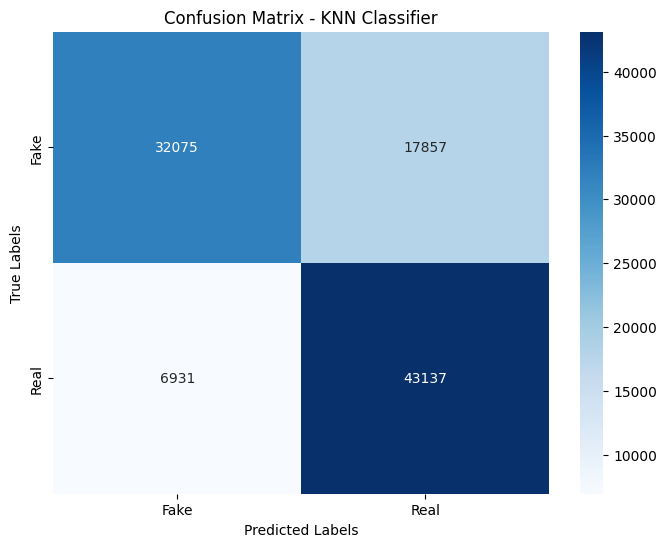

ROC AUC Score: 0.8383


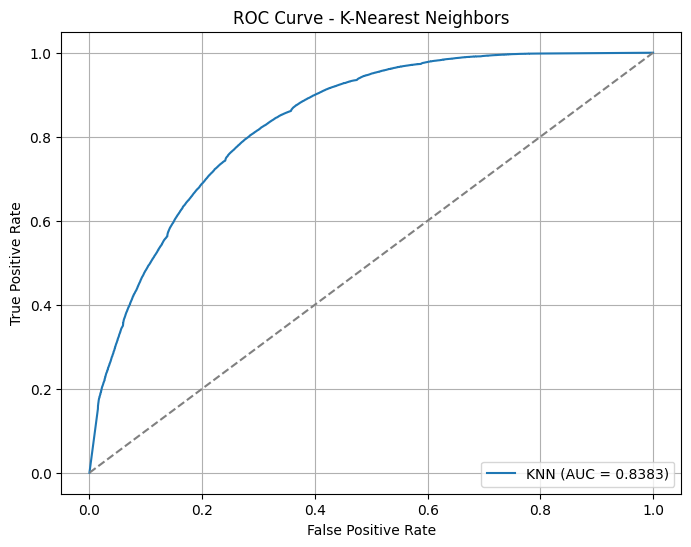

In [27]:
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Define the parameter grid for RandomizedSearchCV
param_grid_knn = {
    'n_neighbors': np.arange(1, 50, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search_knn = RandomizedSearchCV(knn, param_distributions=param_grid_knn, 
                                       n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search_knn.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {random_search_knn.best_params_}")
print(f"Best Cross-validation Score: {random_search_knn.best_score_:.4f}")

# Use the best estimator to make predictions
best_knn = random_search_knn.best_estimator_

# Calculate training accuracy
train_accuracy_knn = accuracy_score(y_train, best_knn.predict(X_train_scaled))
print(f"Training Accuracy: {train_accuracy_knn:.4f}")

# Make predictions on the test set
y_pred_knn = best_knn.predict(X_test_scaled)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Generate the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm_knn)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - KNN Classifier')

# Save the heatmap as a PNG image
plt.savefig('Model_5_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Predict probabilities for ROC AUC calculation
y_prob_knn = best_knn.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
print(f"ROC AUC Score: {roc_auc_knn:.4f}")

# Plot ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {roc_auc_knn:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Nearest Neighbors')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Model 6: Logistic Regression

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters: {'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 20, 'C': 0.0001}
Best Cross-validation Score: 0.5121
Training Accuracy: 0.5243
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.41      0.46     49932
           1       0.52      0.64      0.58     50068

    accuracy                           0.52    100000
   macro avg       0.53      0.52      0.52    100000
weighted avg       0.53      0.52      0.52    100000



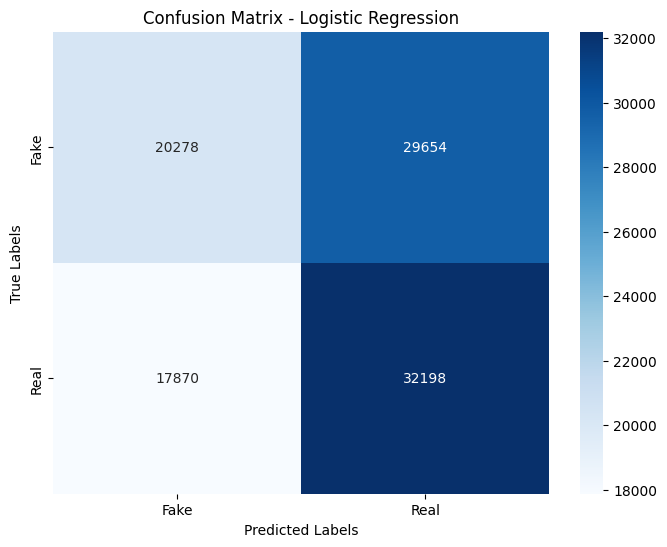

ROC AUC Score: 0.5037


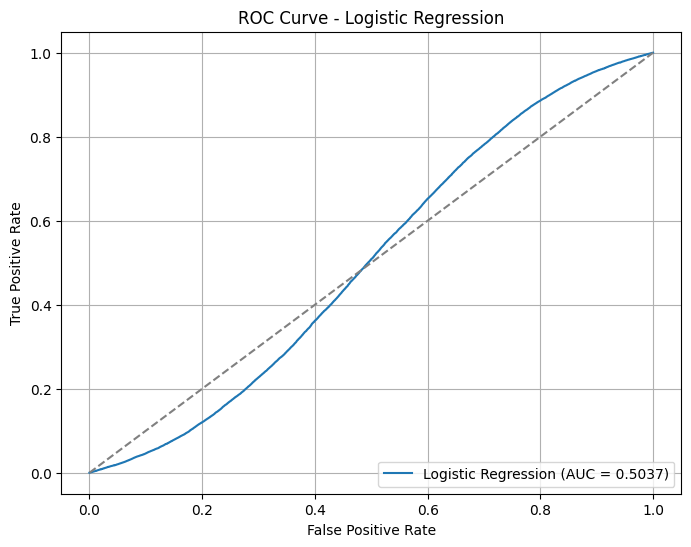

In [28]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for RandomizedSearchCV
param_grid_log_reg = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'penalty': ['l1', 'l2'],      # Regularization types
    'solver': ['liblinear', 'saga'],  # Solvers that support both l1 and l2 penalties
    'max_iter': [10, 20, 30]   # Maximum iterations for convergence
}

# Initialize Logistic Regression classifier
log_reg = LogisticRegression(random_state=42)

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search_log_reg = RandomizedSearchCV(log_reg, param_distributions=param_grid_log_reg, 
                                           n_iter=10, cv=2, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search_log_reg.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {random_search_log_reg.best_params_}")
print(f"Best Cross-validation Score: {random_search_log_reg.best_score_:.4f}")

# Use the best estimator to make predictions
best_log_reg = random_search_log_reg.best_estimator_

# Calculate training accuracy
train_accuracy_log_reg = accuracy_score(y_train, best_log_reg.predict(X_train_scaled))
print(f"Training Accuracy: {train_accuracy_log_reg:.4f}")

# Make predictions on the test set
y_pred_log_reg = best_log_reg.predict(X_test_scaled)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Generate the confusion matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')

# Save the heatmap as a PNG image
plt.savefig('Model_6_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Predict probabilities for ROC AUC calculation
y_prob_log_reg = best_log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
print(f"ROC AUC Score: {roc_auc_log_reg:.4f}")

# Plot ROC curve
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_prob_log_reg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f"Logistic Regression (AUC = {roc_auc_log_reg:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Model 7: Cat Boost

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters: {'learning_rate': 0.2, 'l2_leaf_reg': 1, 'iterations': 300, 'depth': 10, 'border_count': 128}
Best Cross-validation Score: 0.7668
Training Accuracy: 0.8228
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76     49932
           1       0.75      0.83      0.79     50068

    accuracy                           0.78    100000
   macro avg       0.78      0.78      0.77    100000
weighted avg       0.78      0.78      0.77    100000



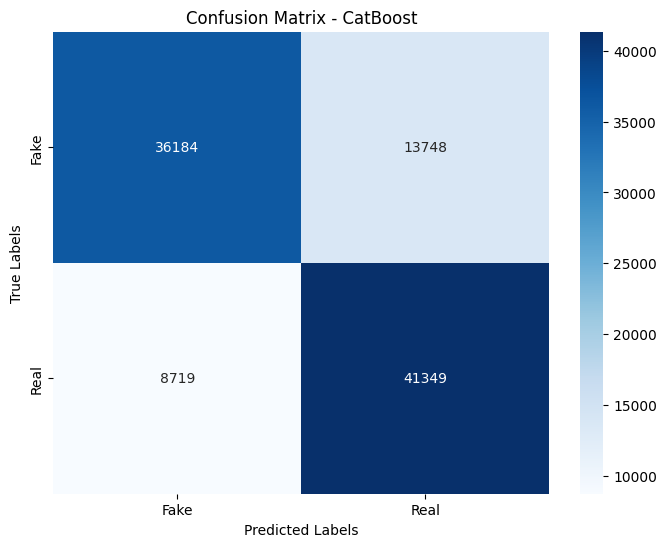

ROC AUC Score: 0.8562


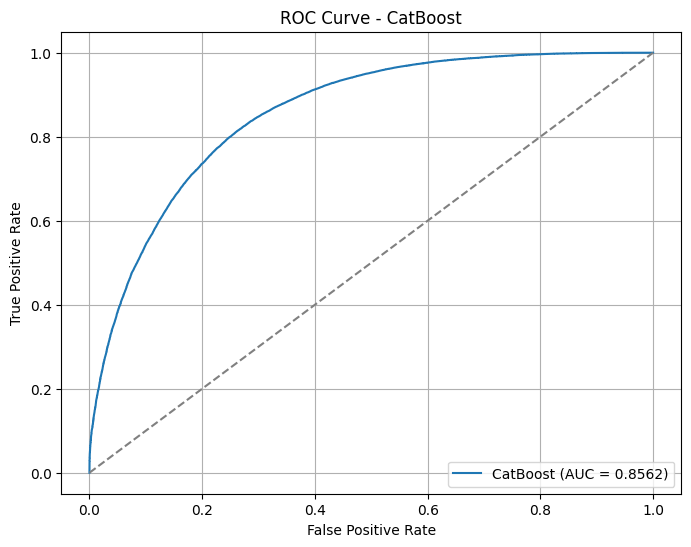

In [29]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for RandomizedSearchCV
param_grid_catboost = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [4, 6, 8, 10],
    'iterations': [100, 200, 300, 500],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128]
}

# Initialize the CatBoost classifier
catboost = CatBoostClassifier(verbose=0, random_state=42)

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search_catboost = RandomizedSearchCV(catboost, param_distributions=param_grid_catboost, 
                                            n_iter=10, cv=2, verbose=1, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search_catboost.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {random_search_catboost.best_params_}")
print(f"Best Cross-validation Score: {random_search_catboost.best_score_:.4f}")

# Use the best estimator to make predictions
best_catboost = random_search_catboost.best_estimator_

# Calculate training accuracy
train_accuracy_catboost = accuracy_score(y_train, best_catboost.predict(X_train_scaled))
print(f"Training Accuracy: {train_accuracy_catboost:.4f}")

# Make predictions on the test set
y_pred_catboost = best_catboost.predict(X_test_scaled)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_catboost))

# Generate the confusion matrix
cm_catboost = confusion_matrix(y_test, y_pred_catboost)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_catboost, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - CatBoost')

# Save the heatmap as a PNG image
plt.savefig('Model_7_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Predict probabilities for ROC AUC calculation
y_prob_catboost = best_catboost.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc_catboost = roc_auc_score(y_test, y_prob_catboost)
print(f"ROC AUC Score: {roc_auc_catboost:.4f}")

# Plot ROC curve
fpr_catboost, tpr_catboost, thresholds_catboost = roc_curve(y_test, y_prob_catboost)
plt.figure(figsize=(8, 6))
plt.plot(fpr_catboost, tpr_catboost, label=f"CatBoost (AUC = {roc_auc_catboost:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Model 8: Gradient Boosting

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters: {'subsample': 0.6, 'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 6, 'learning_rate': 0.2}
Best Cross-validation Score: 0.7028
Training Accuracy: 0.7095
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.61      0.67     49932
           1       0.67      0.80      0.73     50068

    accuracy                           0.70    100000
   macro avg       0.71      0.70      0.70    100000
weighted avg       0.71      0.70      0.70    100000



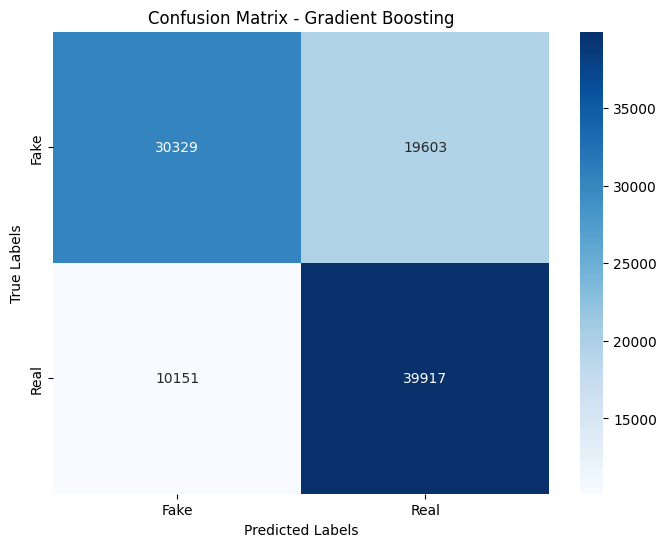

ROC AUC Score: 0.7740


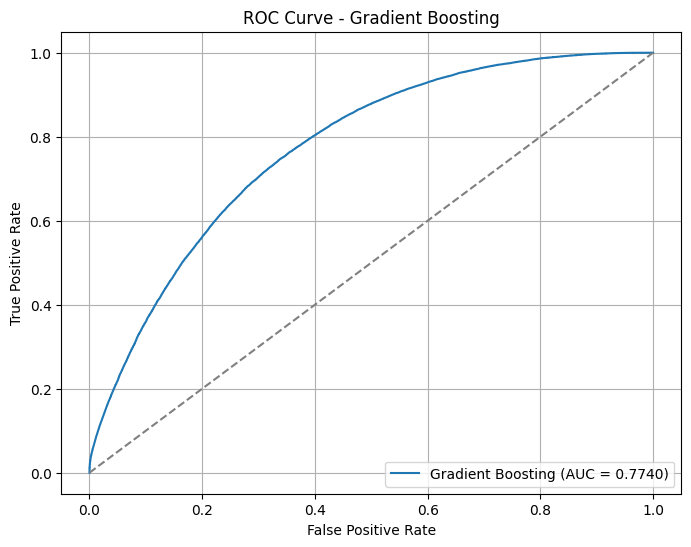

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for RandomizedSearchCV
param_grid_gboost = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [10, 20, 30, 50],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting classifier
gboost = GradientBoostingClassifier(random_state=42)

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search_gboost = RandomizedSearchCV(estimator=gboost, param_distributions=param_grid_gboost, 
                                          n_iter=10, cv=2, verbose=1, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search_gboost.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {random_search_gboost.best_params_}")
print(f"Best Cross-validation Score: {random_search_gboost.best_score_:.4f}")

# Use the best estimator to make predictions
best_gboost = random_search_gboost.best_estimator_

# Calculate training accuracy
train_accuracy_gboost = accuracy_score(y_train, best_gboost.predict(X_train_scaled))
print(f"Training Accuracy: {train_accuracy_gboost:.4f}")

# Make predictions on the test set
y_pred_gboost = best_gboost.predict(X_test_scaled)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_gboost))

# Generate the confusion matrix
cm_gboost = confusion_matrix(y_test, y_pred_gboost)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gboost, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Gradient Boosting')

# Save the heatmap as a PNG image
plt.savefig('Model_8_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Predict probabilities for ROC AUC calculation
y_prob_gboost = best_gboost.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score
roc_auc_gboost = roc_auc_score(y_test, y_prob_gboost)
print(f"ROC AUC Score: {roc_auc_gboost:.4f}")

# Plot ROC curve
fpr_gboost, tpr_gboost, thresholds_gboost = roc_curve(y_test, y_prob_gboost)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gboost, tpr_gboost, label=f"Gradient Boosting (AUC = {roc_auc_gboost:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Model 9: Adaboost

Fitting 2 folds for each of 20 candidates, totalling 40 fits


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters: {'n_estimators': 300, 'learning_rate': 0.2, 'estimator__min_samples_split': 10, 'estimator__min_samples_leaf': 5, 'estimator__max_depth': 7}
Training Accuracy (Tuned): 0.8061
Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.81      0.70      0.75     49932
           1       0.74      0.83      0.78     50068

    accuracy                           0.77    100000
   macro avg       0.77      0.77      0.76    100000
weighted avg       0.77      0.77      0.76    100000



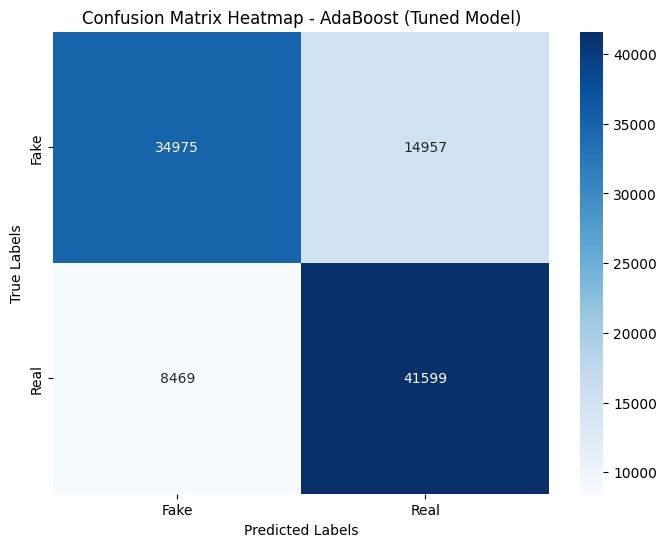

ROC AUC Score (Tuned): 0.8434


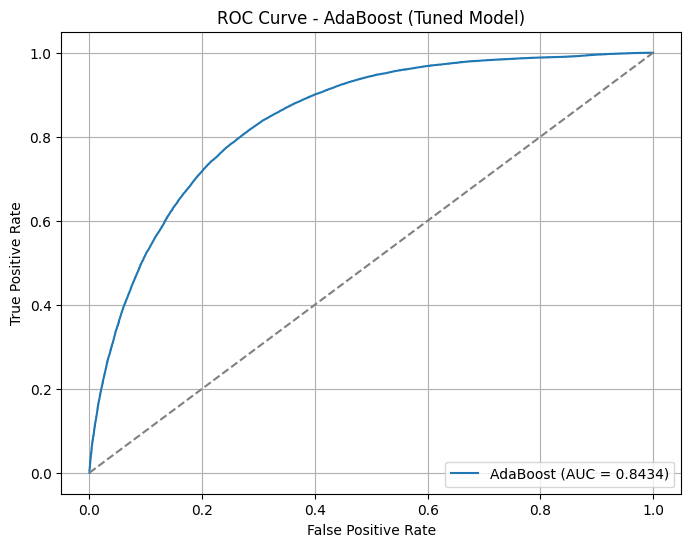

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the parameter grid for AdaBoost
param_grid_adaboost = {
    'n_estimators': np.arange(50, 400, 50),  # Number of weak learners (decision trees)
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1.0],  # Learning rate
    'estimator__max_depth': np.arange(1, 10),  # Max depth of the base decision tree
    'estimator__min_samples_split': np.arange(2, 20, 2),  # Minimum samples required to split a node
    'estimator__min_samples_leaf': np.arange(1, 10)  # Minimum samples required at each leaf node
}

# Initialize the AdaBoost classifier with a DecisionTree as the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Initialize RandomizedSearchCV for hyperparameter tuning
random_search_adaboost = RandomizedSearchCV(
    estimator=adaboost,
    param_distributions=param_grid_adaboost,
    n_iter=20,  # Number of parameter settings that are sampled
    scoring='roc_auc',  # Metric to optimize
    cv=2,  # 3-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit the model to find the best parameters
random_search_adaboost.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params_adaboost = random_search_adaboost.best_params_
print(f"Best Parameters: {best_params_adaboost}")

# Train the tuned model with the best parameters
adaboost_best = random_search_adaboost.best_estimator_

# Calculate training accuracy for the tuned model
train_accuracy_adaboost_best = accuracy_score(y_train, adaboost_best.predict(X_train_scaled))
print(f"Training Accuracy (Tuned): {train_accuracy_adaboost_best:.4f}")

# Make predictions on the test set
y_pred_adaboost_best = adaboost_best.predict(X_test_scaled)

# Generate the classification report for the tuned model
print("Classification Report (Tuned):")
print(classification_report(y_test, y_pred_adaboost_best))

# Generate the confusion matrix
cm_adaboost_best = confusion_matrix(y_test, y_pred_adaboost_best)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adaboost_best, annot=True, fmt="d", cmap="Blues", xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap - AdaBoost (Tuned Model)')

# Save the heatmap as a PNG image
plt.savefig('Model_9_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Predict probabilities for ROC AUC calculation
y_prob_adaboost_best = adaboost_best.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC AUC score for the tuned model
roc_auc_adaboost_best = roc_auc_score(y_test, y_prob_adaboost_best)
print(f"ROC AUC Score (Tuned): {roc_auc_adaboost_best:.4f}")

# Plot ROC curve for the tuned model
fpr_adaboost_best, tpr_adaboost_best, thresholds_adaboost_best = roc_curve(y_test, y_prob_adaboost_best)
plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost_best, tpr_adaboost_best, label=f"AdaBoost (AUC = {roc_auc_adaboost_best:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost (Tuned Model)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Model 10: Guassian NB

Classification Report (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.67      0.29      0.40     49932
           1       0.55      0.86      0.67     50068

    accuracy                           0.57    100000
   macro avg       0.61      0.57      0.54    100000
weighted avg       0.61      0.57      0.54    100000



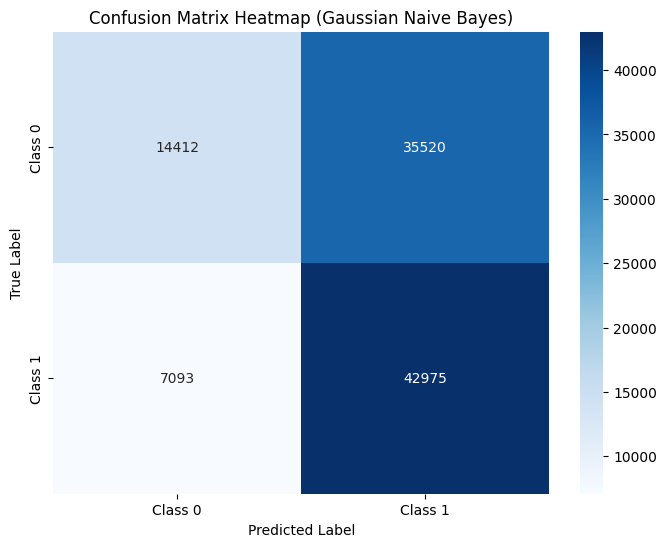

ROC AUC Score (Gaussian Naive Bayes): 0.6374


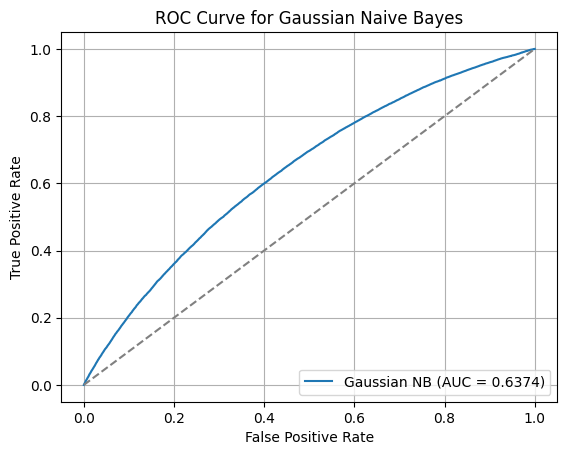

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Gaussian Naive Bayes setup and training
gnb = GaussianNB()

# Fit the Gaussian Naive Bayes model
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)

# Print classification report and confusion matrix for Gaussian Naive Bayes
print("Classification Report (Gaussian Naive Bayes):")
print(classification_report(y_test, y_pred_gnb))

# Generate the confusion matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix Heatmap (Gaussian Naive Bayes)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Save the heatmap as a PNG image
plt.savefig('Model_10_confusion_matrix.png', dpi=300, bbox_inches='tight')

# Display the heatmap
plt.show()

# Calculate and print ROC AUC score for Gaussian Naive Bayes
roc_auc_gnb = roc_auc_score(y_test, gnb.predict_proba(X_test_scaled)[:, 1])
print(f"ROC AUC Score (Gaussian Naive Bayes): {roc_auc_gnb:.4f}")

# Plot ROC curve for Gaussian Naive Bayes only
fpr_gnb, tpr_gnb, _ = roc_curve(y_test, gnb.predict_proba(X_test_scaled)[:, 1])

#plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, label=f"Gaussian NB (AUC = {roc_auc_gnb:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## Results Comparison

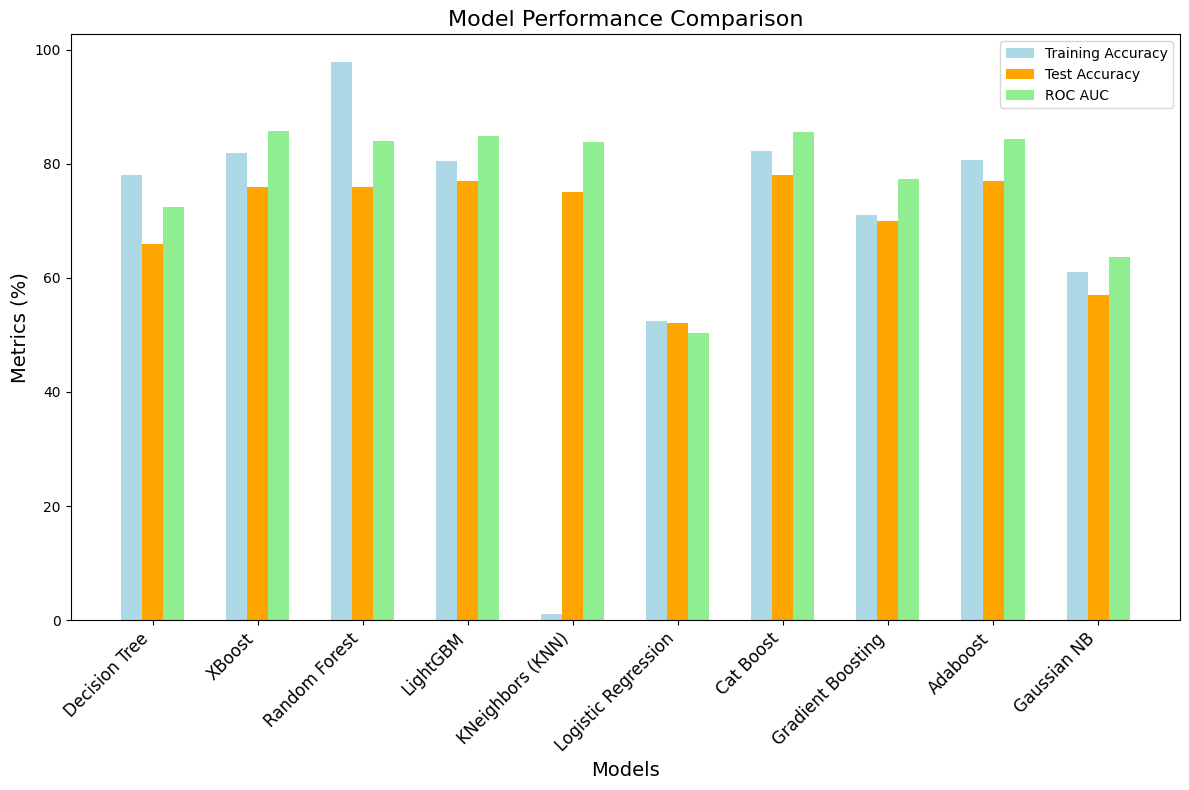

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = {
    'Model': ['Decision Tree', 'XBoost', 'Random Forest', 'LightGBM', 'KNeighbors (KNN)', 'Logistic Regression', 'Cat Boost', 'Gradient Boosting', 'Adaboost', 'Gaussian NB'],
    'Accuracy': [77.97, 81.92, 97.80, 80.42, 1.0, 52.43, 82.28, 70.95, 80.61, 61.0],
    'Test Accuracy': [66, 76, 76, 77, 75, 52, 78, 70, 77, 57],
    'ROC AUC': [72.44, 85.76, 83.98, 84.93, 83.83, 50.37, 85.62, 77.40, 84.34, 63.74]
}

models = metrics['Model']
accuracy = metrics['Accuracy']
test_accuracy = metrics['Test Accuracy']
roc_auc = metrics['ROC AUC']

# Set figure size
plt.figure(figsize=(12, 8))

# Define width of the bars
bar_width = 0.2
index = np.arange(len(models))

# Plot bars
plt.bar(index, accuracy, bar_width, label='Training Accuracy', color='lightblue')
plt.bar(index + bar_width, test_accuracy, bar_width, label='Test Accuracy', color='orange')
plt.bar(index + 2 * bar_width, roc_auc, bar_width, label='ROC AUC', color='lightgreen')

# Add model labels
plt.xlabel('Models', fontsize=14)
plt.ylabel('Metrics (%)', fontsize=14)
plt.title('Model Performance Comparison', fontsize=16)
plt.xticks(index + bar_width, models, rotation=45, ha="right", fontsize=12)

# Add legend
plt.legend()

# Improve layout
plt.tight_layout()

# Save the heatmap as a PNG image
plt.savefig('All_Models_Comparison.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
